In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

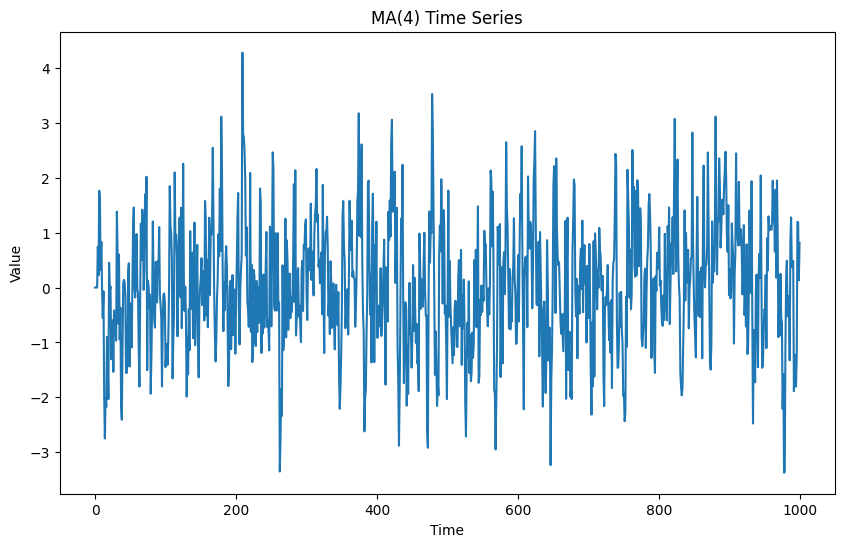

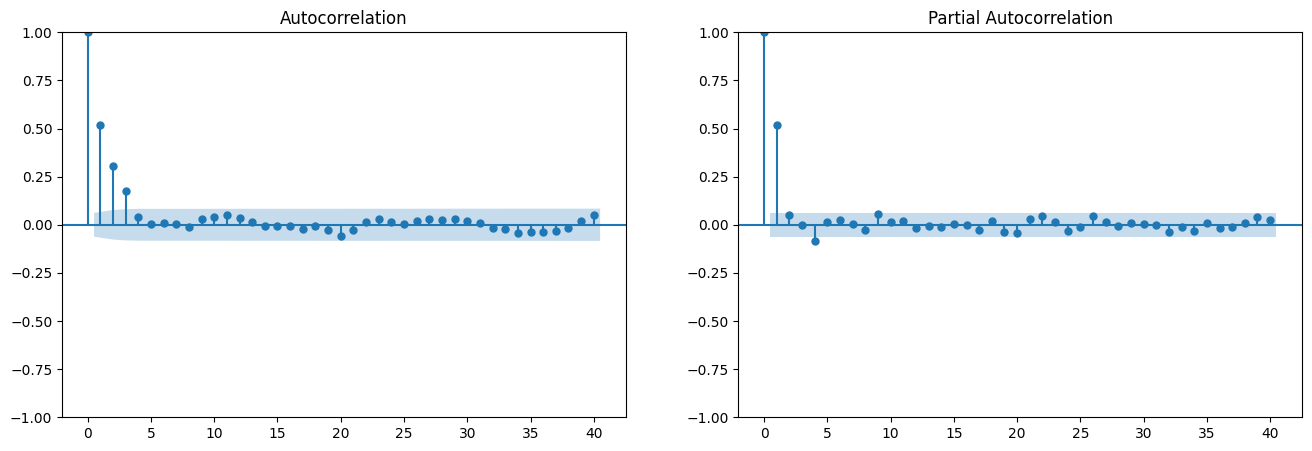

Dickey-Fuller Test:
  Test Statistic: -13.367943909714215
  p-value: 5.267433115163842e-25
  Number of Lags Used: 3
  Number of Observations Used: 996
  1%: -3.4369325637409154
  5%: -2.8644462162311934
  10%: -2.568317409920808
Reject the null hypothesis - the series is stationary.


In [4]:
## generar una seria de tiempo MA(4) y graficar el correlograma y correlograma parcial
def generate_ma_series(n=1000, ma_params=[0.5, 0.3, 0.2, 0.1], seed=42):
    np.random.seed(seed)
    noise = np.random.normal(size=n)
    ma_series = np.zeros(n)
    
    for i in range(len(ma_params), n):
        ma_series[i] = sum(ma_params[j] * noise[i - j - 1] for j in range(len(ma_params))) + noise[i]
    
    return pd.Series(ma_series)

def plot_acf_pacf(series, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[0])
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[1])
    plt.show()

def test_dickey_fuller(series, alpha=0.05):
    result = sm.tsa.stattools.adfuller(series)
    print('Dickey-Fuller Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print(f'  Number of Lags Used: {result[2]}')
    print(f'  Number of Observations Used: {result[3]}')
    for key, value in result[4].items():
        print(f'  {key}: {value}')
    
    if result[1] < alpha:
        print("Reject the null hypothesis - the series is stationary.")
    else:
        print("Fail to reject the null hypothesis - the series is non-stationary.")
def test_dickey_fuller_with_plot(series, alpha=0.05):
    result = sm.tsa.stattools.adfuller(series)
    print('Dickey-Fuller Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print(f'  Number of Lags Used: {result[2]}')
    print(f'  Number of Observations Used: {result[3]}')
    for key, value in result[4].items():
        print(f'  {key}: {value}')
    
    if result[1] < alpha:
        print("Reject the null hypothesis - the series is stationary.")
    else:
        print("Fail to reject the null hypothesis - the series is non-stationary.")
    
    plt.figure(figsize=(10, 6))
    plt.plot(series)
    plt.title('Time Series Plot')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

def test_dickey_fuller_with_plot_and_acf(series, lags=40, alpha=0.05):
    test_dickey_fuller_with_plot(series, alpha)
    plot_acf_pacf(series, lags)    

def test_dickey_fuller_with_plot_and_acf_pacf(series, lags=40, alpha=0.05):
    test_dickey_fuller_with_plot(series, alpha)
    plot_acf_pacf(series, lags)

def test_dickey_fuller_with_plot_and_acf_pacf_and_seasonal(series, lags=40, seasonal_lags=12, alpha=0.05):
    test_dickey_fuller_with_plot(series, alpha)
    plot_acf_pacf(series, lags)
    
    seasonal_series = series.resample('M').mean()
    seasonal_series.plot(title='Seasonal Series')
    plt.show()
    
    sm.graphics.tsa.plot_acf(seasonal_series, lags=seasonal_lags)
    sm.graphics.tsa.plot_pacf(seasonal_series, lags=seasonal_lags)
    plt.show()
def test_dickey_fuller_with_plot_and_acf_pacf_and_seasonal_and_trend(series, lags=40, seasonal_lags=12, alpha=0.05):
    test_dickey_fuller_with_plot(series, alpha)
    plot_acf_pacf(series, lags)
    
    seasonal_series = series.resample('M').mean()
    seasonal_series.plot(title='Seasonal Series')
    plt.show()
    
    sm.graphics.tsa.plot_acf(seasonal_series, lags=seasonal_lags)
    sm.graphics.tsa.plot_pacf(seasonal_series, lags=seasonal_lags)
    plt.show()
    
    trend = np.arange(len(seasonal_series))
    seasonal_series_with_trend = seasonal_series + trend
    seasonal_series_with_trend.plot(title='Seasonal Series with Trend')
    plt.show()

## Test de Dickey-Fuller  con GLS
def test_dickey_fuller_gls(series, alpha=0.05):
    result = sm.tsa.stattools.adfuller(series, regression='ct')
    print('Dickey-Fuller GLS Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print(f'  Number of Lags Used: {result[2]}')
    print(f'  Number of Observations Used: {result[3]}')
    for key, value in result[4].items():
        print(f'  {key}: {value}')
    
    if result[1] < alpha:
        print("Reject the null hypothesis - the series is stationary.")
    else:
        print("Fail to reject the null hypothesis - the series is non-stationary.")


# graficar la serie de tiempo MA(4) y sus correlogramas
ma_series = generate_ma_series()
plt.figure(figsize=(10, 6))
plt.plot(ma_series)
plt.title('MA(4) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# graficar el correlograma y correlograma parcial
plot_acf_pacf(ma_series)    
# realizar la prueba de Dickey-Fuller
test_dickey_fuller(ma_series)

# Ejercicios de clase

         wheat_srw  wheat_hrw
yearmm                       
1980M01     169.71     175.63
1980M02     170.49     172.70
1980M03     162.40     163.51
1980M04     155.80     156.53
1980M05     156.20     161.30


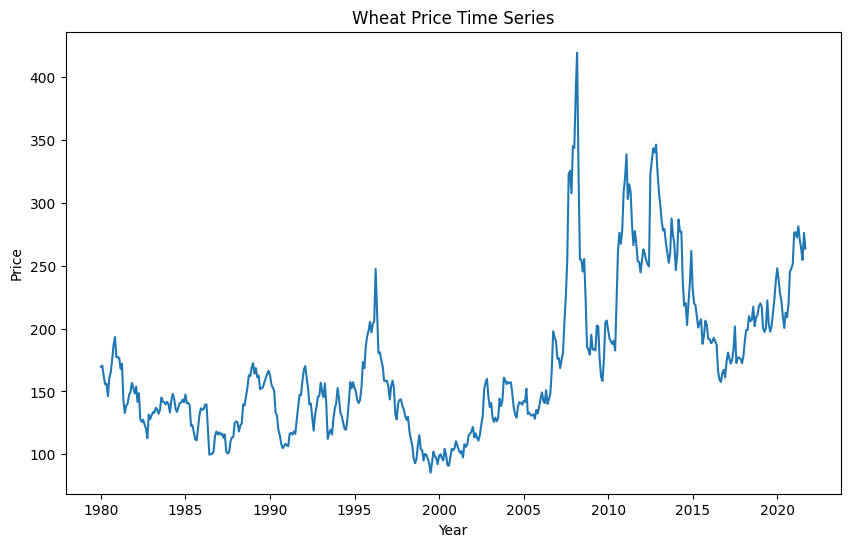

In [27]:
## Cargo el excel wheat.xlsx el formato de la fecha en el campo 1970M01, 1979M02,etc
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./wheat.xlsx')
#convertir el índice a tipo datetime

df=df.set_index('yearmm').sort_index()
print(df.head())

## dibujar la seria de tiempo para la columna wheatsrw. Como le eje x son los años pero son muchas muestras quiero que solo se muestre el label de cada 10 años
df['wheat_srw'] = pd.to_numeric(df['wheat_srw'], errors='coerce')
df = df.dropna(subset=['wheat_srw'])
df.index = pd.to_datetime(df.index, format='%YM%m')
df = df.sort_index()
#Ahora dibujo el ds
plt.figure(figsize=(10, 6))
plt.plot(df['wheat_srw'])
plt.title('Wheat Price Time Series')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show() 



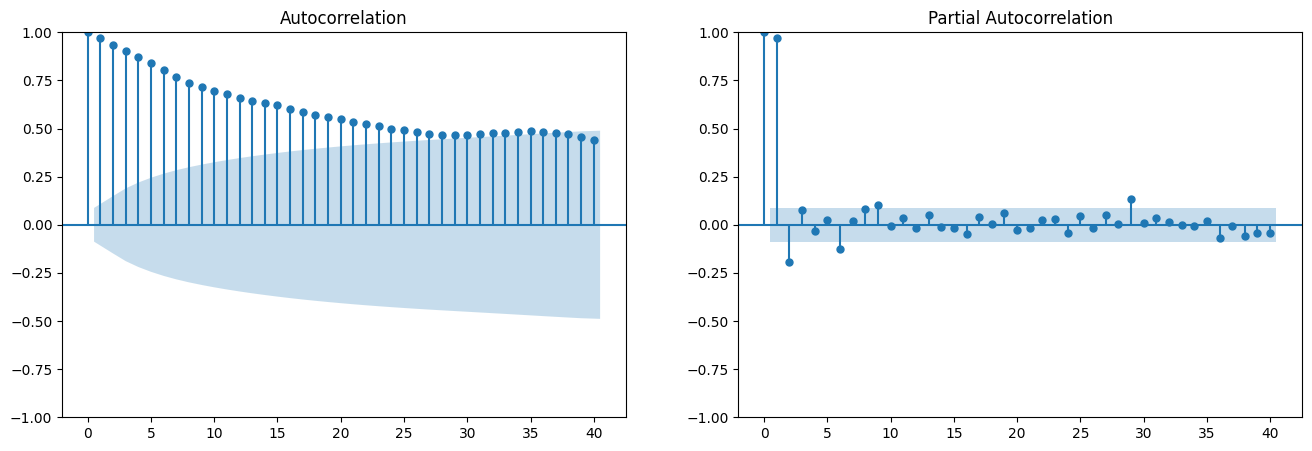

In [28]:
plot_acf_pacf(df['wheat_srw'])